In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
import nltk

In [3]:
#nltk.download()

### Попробуйте обучить нейронную сеть на TensorFlow 2 на любом датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [4]:
imdb = keras.datasets.imdb

In [5]:
word2index = imdb.get_word_index()
word2index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [7]:
from nltk import word_tokenize

In [8]:
x_test.shape, x_train.shape, 

((25000,), (25000,))

In [9]:
np.hstack(x_train[0])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [10]:
# посмотпим что представляет собой отзыв
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in x_train[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [11]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)  # Объеденим train и test 

In [13]:
0 in np.hstack(data)

False

In [14]:
print("Categories:", len(np.unique(data)))

Categories: 49579


In [15]:
unique_words=len(np.unique(np.hstack(data)))
unique_words

9998

In [16]:
max_unique_indx=max(np.unique(np.hstack(data)))
max_unique_indx

9999

In [17]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173.0


Можно видеть, что все данные относятся к двум категориям: 0 или 1, что определяет отзык + или -. Весь датасет содержит 9998 уникальных слов, 49579 уникальях отзывов,  средний размер обзора составляет 234 слова со стандартным отклонением 173.

Каждая строка нашего датасета - это набор цифр(каждой цифре соответствует слово). Длина отзывов различается. <br>
Чтобы узнать, сколько мы хотим использовать входных нейронов, нам нужно найти самый длинный отзыв, а менее короткие дозаполнить нулями.

In [18]:
max_len =np.max([len(data[i]) for i in range(len(data))])
max_len  # максимальная длина отзыва

2494

In [19]:
targets = np.array(targets).astype("float32")
targets

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [20]:
def vectorize(sequences, dimension = max_len):
    res = np.zeros((len(sequences), dimension))
    print(res.shape)
    for i, sequence in enumerate(sequences):
        res[i,0:len(sequence)] = np.array(sequence).astype("float32")
    return res

data_pr_1 = vectorize(data)
print(data_pr_1[0])
x_train_1 = data_pr_1[10000:]
x_test_1 = data_pr_1[:10000]

(50000, 2494)
[ 1. 14. 22. ...  0.  0.  0.]


In [21]:
#def vectorize(sequences, dimension = unique_words):
#    results = np.zeros((len(sequences), dimension))
#    for i, sequence in enumerate(sequences):
#        results[i,0: len(sequence)] = 1
#    return results

In [22]:
def vectorize_sequences(sequences, dimension=max_unique_indx+1):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

In [23]:
data_pr = vectorize_sequences(data)

In [24]:
data_pr[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
# есть  подходящая встроенная функция
#x_train = keras.preprocessing.sequence.pad_sequences(x_train, max_len, padding='post')
#x_test = keras.preprocessing.sequence.pad_sequences(x_test, max_len, padding='post')

In [26]:
#from sklearn.model_selection import train_test_split

In [27]:
#X_train, X_test, y_train, y_test = train_test_split(data_pr, targets, test_size=0.33, random_state=42)

In [28]:
#import tensorflow.keras.backend as K
#X_train = K.constant(X_train)

In [29]:
x_train = data_pr[10000:]
y_train = targets[10000:]
x_test = data_pr[:10000]
y_test = targets[:10000]

In [30]:
type(x_train[0])

numpy.ndarray

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               319360    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 327,681
Trainable params: 327,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
71/71 [==============================] - 2s 25ms/step - loss: 55.1167 - accuracy: 0.5037 - val_loss: 15.4537 - val_accuracy: 0.4978
Epoch 2/5
71/71 [==============================] - 1s 19ms/step - loss: 8.8752 - accuracy: 0.5226 - val_loss: 5.6136 - val_accuracy: 0.4983
Epoch 3/5
71/71 [==============================] - 1s 14ms/step - loss: 3.2638 - accuracy: 0.5406 

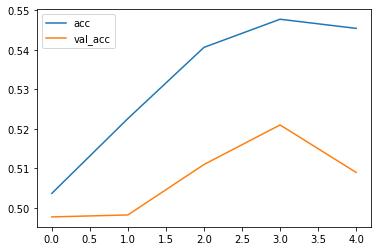

In [31]:
model_imdb_samle_1 = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(max_len,)),   # !!!!! Здесь отличие сетей
    keras.layers.Dense(64, activation='elu'),      
    keras.layers.Dense(1, activation='sigmoid')
]) 
model_imdb_samle_1.summary()
model_imdb_samle_1.compile(optimizer='adam',
                  metrics=['accuracy'],
                  loss='binary_crossentropy')

history = model_imdb_samle_1.fit(x_train_1, y_train, epochs=5, batch_size=512, validation_split=0.1)

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

**Сеть выше явно  неудачная ((((** 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,288,449
Trainable params: 1,288,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
71/71 [==============================] - 4s 54ms/step - loss: 0.3290 - accuracy: 0.8577 - val_loss: 0.2629 - val_accuracy: 0.8935
Epoch 2/5
71/71 [==============================] - 3s 43ms/step - loss: 0.1889 - accuracy: 0.9273 - val_loss: 0.2718 - val_accuracy: 0.8885
Epoch 3/5
71/71 [==============================] - 3s 38ms/step - loss: 0.1547 - accuracy: 0.9

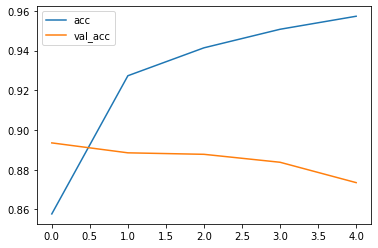

In [32]:
model_imdb_samle = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(max_unique_indx+1,)),
    keras.layers.Dense(64, activation='elu'),      
    keras.layers.Dense(1, activation='sigmoid')
]) 
model_imdb_samle.summary()
model_imdb_samle.compile(optimizer='adam',
                  metrics=['accuracy'],
                  loss='binary_crossentropy')

history = model_imdb_samle.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.1)

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

**Это уже веселее,  и на валиде 0,88**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                159680    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 168,065
Trainable params: 168,065
Non-trainable params: 0
________________________________________________

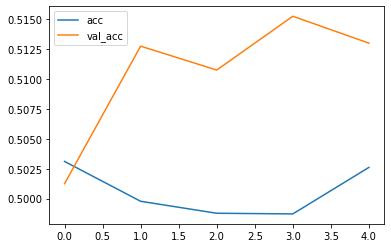

In [34]:
model_imdb = keras.Sequential([
    keras.layers.Dense(64, activation='elu', input_shape=(max_len,)),#max_len,)),
    keras.layers.Dropout(0.3, noise_shape=None, seed=None),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(1, activation='sigmoid')
]) 
model_imdb.summary()
model_imdb.compile(optimizer='adam',
                  metrics=['accuracy'],
                  loss='binary_crossentropy')

history = model_imdb.fit(x_train_1, y_train, epochs=5, batch_size=512, validation_split=0.1)

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

**Вариант с коротким вектором (= максимальной длине отзыва не прокатывает)**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 1,288,449
Trainable params: 1,288,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
71/71 [==============================] - 3s 49ms/step - loss: 0.3307 - accuracy: 0.8583 - val_loss: 0.2581 - val_accuracy: 0.8942
Epoch 2/5
71/71 [==============================] - 3s 43ms/step - loss: 0.1900 - accuracy: 0.9273 - val_loss: 0.2701 - val_accuracy: 0.8940
Epoch 3/5
71/71 [==============================] - 3s 45ms/step - loss: 0.1551 - accuracy: 0.9

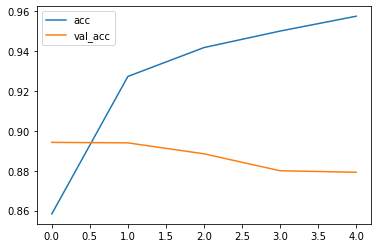

In [33]:
model_imdb_samle = keras.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(max_unique_indx+1,)),
    keras.layers.Dense(64, activation='elu'),      
    keras.layers.Dense(1, activation='sigmoid')
]) 
model_imdb_samle.summary()
model_imdb_samle.compile(optimizer='adam',
                  metrics=['accuracy'],
                  loss='binary_crossentropy')

history = model_imdb_samle.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.1)

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

### Подсмотрел и погуглил, и...... что и следовало ожидать  представив исходные данные в векторном виде при помощи  One hot encoding получен не плохой результат с дропаутом.... Ну это еще учить нужно.